In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from IPython.display import HTML, display
from IPython.core import display as ICD
from plotly.offline import init_notebook_mode, iplot

import statsmodels.api as sm

import statsmodels.formula.api as smf

from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np
import statsmodels.api as sm
import pylab
import scipy as sp

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import linear_model

init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
import math


In [2]:
reader=pd.read_stata("beer.dta",chunksize=100000)

df = pd.DataFrame()

for itm in reader:
    df=df.append(itm)

df.to_csv("beer.csv")

In [3]:
beer_csv=pd.read_csv('beer.csv')

In [4]:
beer_csv.head()

,Unnamed: 0,q,pb,pl,pr,i
0,0,81.7,1.78,6.95,1.11,25088.0
1,1,56.9,2.27,7.32,0.67,26561.0
2,2,64.1,2.21,6.96,0.83,25510.0
3,3,65.4,2.15,7.18,0.75,27158.0
4,4,64.1,2.26,7.46,1.06,27162.0


In [5]:
wage=pd.read_csv('data_football.csv')

In [6]:
wage.head()

,Unnamed: 0,ID,Name,Age,Overall,Value,Wage,Special,Height,Weight,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,94,€110.5M,€565K,2202,5'7,159lbs,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,94,€77M,€405K,2228,6'2,183lbs,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,92,€118.5M,€290K,2143,5'9,150lbs,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,91,€72M,€260K,1471,6'4,168lbs,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,91,€102M,€355K,2281,5'11,154lbs,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [7]:
wage.describe()

,Unnamed: 0,ID,Age,Overall,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,1597.809908,49.734181,45.550911,52.298144,58.686712,42.909026,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,272.586016,18.364524,19.525820,17.379909,14.699495,17.694408,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,731.000000,5.000000,2.000000,4.000000,7.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,1457.000000,38.000000,30.000000,44.000000,54.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,1635.000000,54.000000,49.000000,56.000000,62.000000,44.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,1787.000000,64.000000,62.000000,64.000000,68.000000,57.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,2346.000000,93.000000,95.000000,94.000000,93.000000,90.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [8]:
wage_simple=wage
wage_simple.head()

,Unnamed: 0,ID,Name,Age,Overall,Value,Wage,Special,Height,Weight,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,94,€110.5M,€565K,2202,5'7,159lbs,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,94,€77M,€405K,2228,6'2,183lbs,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,92,€118.5M,€290K,2143,5'9,150lbs,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,91,€72M,€260K,1471,6'4,168lbs,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,91,€102M,€355K,2281,5'11,154lbs,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
wage_simple=wage_simple.dropna()
wage_simple.count()

Unnamed: 0         18159
ID                 18159
Name               18159
Age                18159
Overall            18159
Value              18159
Wage               18159
Special            18159
Height             18159
Weight             18159
Crossing           18159
Finishing          18159
HeadingAccuracy    18159
ShortPassing       18159
Volleys            18159
Dribbling          18159
Curve              18159
FKAccuracy         18159
LongPassing        18159
BallControl        18159
Acceleration       18159
SprintSpeed        18159
Agility            18159
Reactions          18159
Balance            18159
ShotPower          18159
Jumping            18159
Stamina            18159
Strength           18159
LongShots          18159
Aggression         18159
Interceptions      18159
Positioning        18159
Vision             18159
Penalties          18159
Composure          18159
Marking            18159
StandingTackle     18159
SlidingTackle      18159
GKDiving           18159


In [10]:
import re
wage_simple['Weight']=wage_simple['Weight'].astype(str).str[0:3].astype(float)
wage_simple['Value']=wage_simple['Value'].astype(str).apply(lambda x: float(re.findall(r"[-+]?\d*\.\d+|\d+",x)[0])*1000 if "K" in x else float(re.findall(r"[-+]?\d*\.\d+|\d+",x)[0])*1000000)
wage_simple['Wage']=wage_simple.Wage.astype(str).apply(lambda x: float(re.findall(r"[-+]?\d*\.\d+|\d+",x)[0])*1000 if "K" in x else float(re.findall(r"[-+]?\d*\.\d+|\d+",x)[0])*1000000)


In [11]:
wage_simple['Value'];
wage_simple['Height']=wage_simple.Height.astype(str).apply(lambda x: float(x.replace("'",".")))

In [12]:
#wage_simple.Nationality.nunique()

In [13]:
#df = pd.concat([wage_simple,pd.get_dummies(wage_simple['Nationality'], prefix='nat')],axis=1)

In [14]:
#df.drop(['Nationality'],axis=1, inplace=True)

KeyError: "['Nationality'] not found in axis"

In [15]:
df.head()

,q,pb,pl,pr,i
0,81.699997,1.78,6.95,1.11,25088.0
1,56.900002,2.27,7.32,0.67,26561.0
2,64.099998,2.21,6.96,0.83,25510.0
3,65.400002,2.15,7.18,0.75,27158.0
4,64.099998,2.26,7.46,1.06,27162.0


In [ ]:
#df.drop(['nat_Afghanistan'],axis=1,inplace=True)

# START REGRESSION ANALYSIS

In [ ]:
X=df.drop(['Wage','Name','ID'],axis=1)
Y=df.Wage
regr = linear_model.LinearRegression()


In [ ]:
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



In [16]:
wage_simple.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Overall', 'Value', 'Wage',
       'Special', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [17]:

wage_simple.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
wage_simple.head()

,ID,Name,Age,Overall,Value,Wage,Special,Height,Weight,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,94,110500000.0,565000.0,2202,5.70,159.0,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,94,77000000.0,405000.0,2228,6.20,183.0,84.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,92,118500000.0,290000.0,2143,5.90,150.0,79.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,91,72000000.0,260000.0,1471,6.40,168.0,17.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,91,102000000.0,355000.0,2281,5.11,154.0,93.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [19]:
wage_simple=wage_simple[wage_simple['Wage']!=0]
wage_simple=wage_simple[wage_simple['Value']>0]


# Using statsmodel


In [20]:
X=wage_simple.drop(['ID','Name','Wage','Overall','Age','Special','Value','Height','Weight'],axis=1)
X = sm.add_constant(X) # adding a constant
Y=wage_simple['Wage']
model = sm.OLS(Y,X).fit()
#predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:10:41   Log-Likelihood:            -2.0150e+05
No. Observations:               17907   AIC:                         4.031e+05
Df Residuals:                   17872   BIC:                         4.033e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.754e+04   1909.720    -

In [ ]:
freq=wage_simple.Nationality.value_counts()


In [ ]:
freq=freq[freq>200]


In [ ]:
freq.sort_values(ascending=False)[:10].plot.bar()

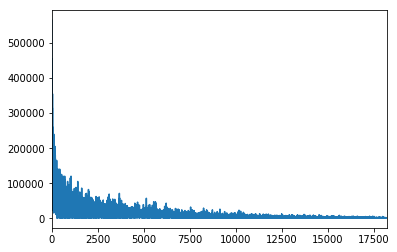

In [22]:
wage_simple.Wage.plot()


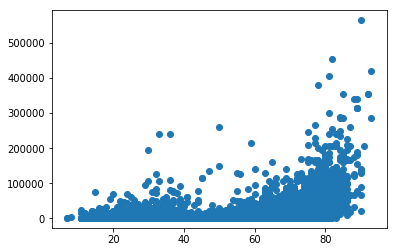

In [21]:
plt.scatter(wage_simple.ShortPassing,wage_simple.Wage)

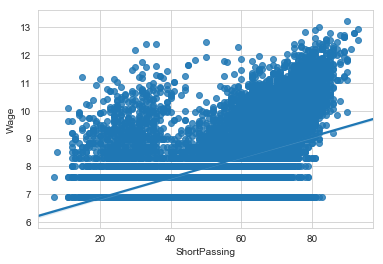

In [24]:
sns.set_style("whitegrid")
sns.regplot(x=wage_simple["ShortPassing"], y=wage_simple.Wage.apply(lambda x: math.log(x)))


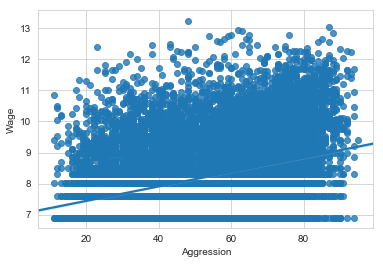

In [26]:
wage_simple.log=wage_simple.Wage.apply(lambda x:math.log(x))

sns.regplot(x=wage_simple["Aggression"], y=wage_simple.log)

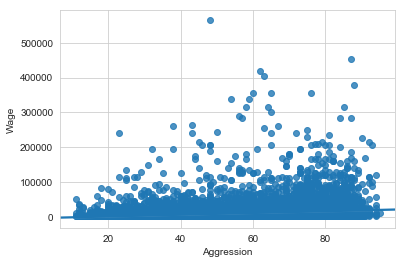

In [ ]:
wage_simple.describe()

In [ ]:
sns.regplot(x=wage_simple.Value, y=wage_simple.Wage)

In [ ]:
wage_simple.info()

In [ ]:
X1=wage_simple.drop(['Wage','Name','ID','Nationality'],axis=1)
Y1=wage_simple.Wage


In [ ]:
X1 = sm.add_constant(X1) # adding a constant
 
model2 = sm.OLS(Y1, X1).fit()
predictions = model2.predict(X1) 
 


In [ ]:
print_model2 = model2.summary()
print(print_model2)

In [ ]:
mod = ols(formula='Wage ~ Age + Overall + Value+ Height+ Weight', data=wage_simple)

res = mod.fit()

print(res.summary())

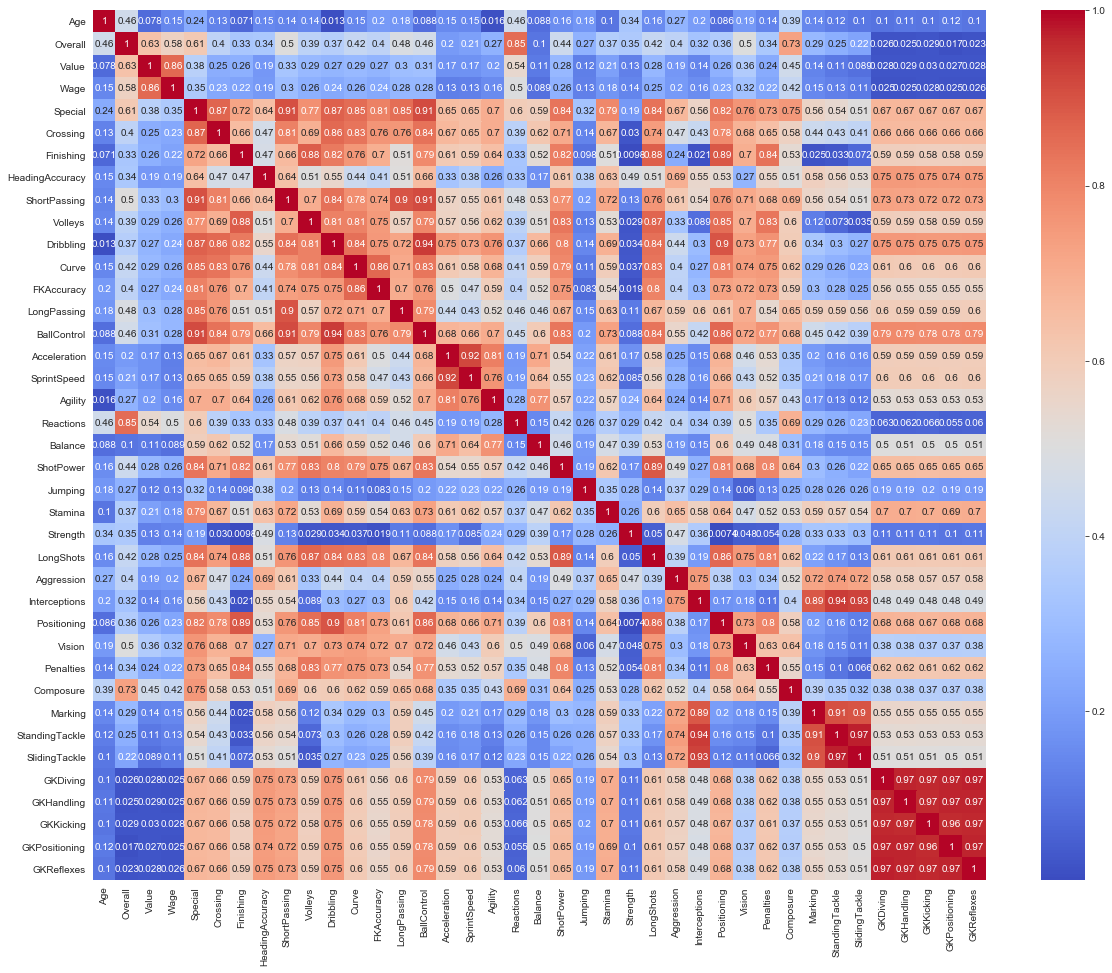

In [35]:
corr_matrix = wage_simple.drop(['ID','Height','Weight','Name'],axis=1).corr().abs()
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')